In [76]:
import os
import skimage
import numpy as np
from skimage import io, exposure
from skimage.viewer import ImageViewer
from IPython.display import Image, display
import matplotlib.pyplot as plt

/Users/rohitvarmabasavaraju/anaconda/lib/python3.6/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


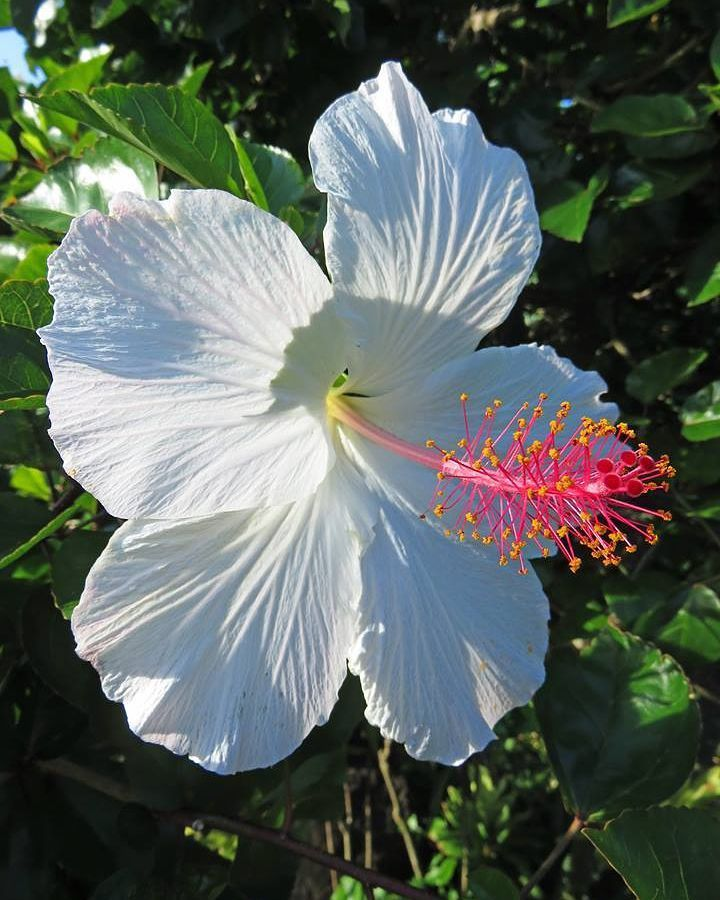

In [73]:
# load a trial image and view
images_dir = r'combined'
sample_plant = r'Hibiscus'
sample_image = r'hibiscus_40.jpg'

sample_image_path = os.path.join(images_dir, sample_plant, sample_image)
hibiscus = io.imread(sample_image_path)
display(Image(sample_image_path))

0.2


/Users/rohitvarmabasavaraju/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


0.4
0.6000000000000001
0.8


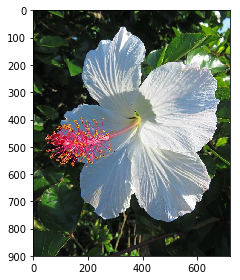

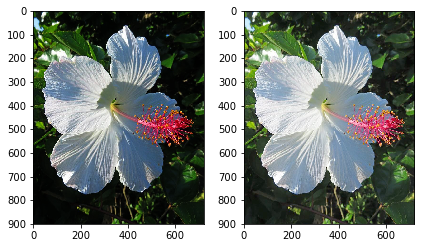

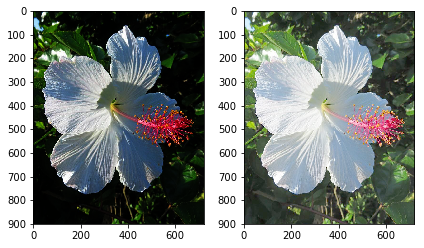

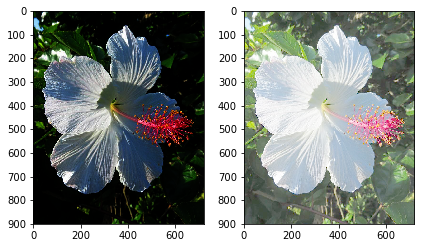

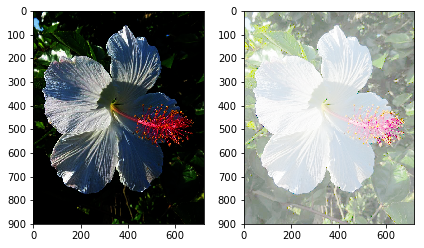

In [98]:
# apply brightness shifts and view
brightness_mods = np.arange(.2, 1, .2)
for b_mod in brightness_mods:
    print(b_mod)
    dim_hibiscus = exposure.adjust_gamma(hibiscus, 1 + 2*b_mod)
    bright_hibiscus = exposure.adjust_gamma(hibiscus, 1 - b_mod)
    
    plt.figure()
    plt.subplot(1, 2, 1)
    io.imshow(dim_hibiscus)
    plt.subplot(1, 2, 2)
    io.imshow(bright_hibiscus)
plt.show()
reflected_hibiscus = hibiscus[:, ::-1]
io.imshow(reflected_hibiscus)

In [75]:
# loop through entire dataset and apply changes
# add new images to the same directories
brightness_mods = np.arange(.2, 1, .2)

plant_dirs = [direc for direc in os.listdir(images_dir) if direc[0] != '.']

for plant in plant_dirs:
    images = os.listdir(os.path.join(images_dir, plant))
    for image in images:
        image_path = os.path.join(images_dir, plant, image)
        image_array = io.imread(image_path)
        for b_mod in brightness_mods:
            dim_plant = exposure.adjust_gamma(image_array, 1 + 2*b_mod)
            bright_plant = exposure.adjust_gamma(image_array, 1 - b_mod)
            io.imsave(image_path[:-4] + '_dim_' + str(2*b_mod) + '.jpg', dim_plant)
            io.imsave(image_path[:-4] + '_bright_' + str(b_mod) + '.jpg', bright_plant)

OSError: cannot identify image file <_io.BufferedReader name='combined/Aleurites/Aleurites moluccana %D4%C7%F4 Kukui_116.jpg'>

In [71]:
# loop through augmented data set and reflect
for plant in plant_dirs:
    images = os.listdir(os.path.join(images_dir, plant))
    for image in images:
        image_path = os.path.join(images_dir, plant, image)
        image_array = io.imread(image_path)
        reflected_plant = image_array[:, ::-1]
        io.imsave(image_path[:-4] + '_ref_' + '.jpg', reflected_plant)